1) importation de la bibliothèque pandas

In [47]:
import pandas as pd

2) Charger le fichier "country.csv" et afficher le dataframe 

In [48]:
df=pd.read_csv("country.csv")
df

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623


3) Vérifier l'existence de valeurs nulls dans le dataframe

In [49]:
df.isna().sum()

country      0
year         0
pop          0
continent    0
lifeExp      0
gdpPercap    0
dtype: int64

4)
* Renommer les colonnes (pop, lifeExp, gdpPercap) par (Population, Age, PIB)
* Afficher le dataframe

In [50]:
df.rename(columns = {'pop':'Population','lifeExp':'Age','gdpPercap':'PIB'}, inplace = True)
df

,country,year,Population,continent,Age,PIB
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623


5) Afficher le nombre de pays pour chaque continent

In [51]:
df.groupby('continent').country.nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

6) Pour chaque contient, vérifier l'existence de valeurs abbérantes pour la variable Age

<AxesSubplot: title={'center': 'Age'}, xlabel='continent'>

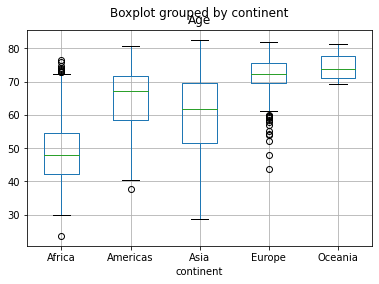

In [52]:
df.boxplot(column='Age',by='continent')

7) Pour le contient Africa, afficher le dataframe (df1) contenant les pays dont la variable Age est une valeur abbérante.  

In [53]:
df1 = df[df.continent=='Africa']
df1

,country,year,Population,continent,Age,PIB
24,Algeria,1952,9279525.0,Africa,43.077,2449.008185
25,Algeria,1957,10270856.0,Africa,45.685,3013.976023
26,Algeria,1962,11000948.0,Africa,48.303,2550.816880
27,Algeria,1967,12760499.0,Africa,51.407,3246.991771
28,Algeria,1972,14760787.0,Africa,54.518,4182.663766
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623


In [54]:

def calculs(dataframe):
  q1 = dataframe.quantile(q=0.25)
  q2 = dataframe.quantile(q=0.5)
  q3 = dataframe.quantile(q=0.75)
  irq = q3 - q1
  lower_limit = q1 - irq * 1.5
  upper_limit = q3 + irq * 1.5  
  return q1,q2,q3,lower_limit,upper_limit
q1,q2,q3,lower_limit,upper_limit = calculs(df1.Age)
df1[(df1.Age<= lower_limit) | (df1.Age >=upper_limit)]

,country,year,Population,continent,Age,PIB
910,Libya,2002,5368585.0,Africa,72.737,9534.677467
911,Libya,2007,6036914.0,Africa,73.952,12057.499280
983,Mauritius,2007,1250882.0,Africa,72.801,10956.991120
1268,Reunion,1992,622191.0,Africa,73.615,6101.255823
1269,Reunion,1997,684810.0,Africa,74.772,6071.941411
1270,Reunion,2002,743981.0,Africa,75.744,6316.165200
1271,Reunion,2007,798094.0,Africa,76.442,7670.122558
1292,Rwanda,1992,7290203.0,Africa,23.599,737.068595
1570,Tunisia,2002,9770575.0,Africa,73.042,5722.895655
1571,Tunisia,2007,10276158.0,Africa,73.923,7092.923025


8) Pour l'année 2007, vérifier pour chaque continent l'existence de valeurs abbérantes pour la variable PIB.

<AxesSubplot: title={'center': 'PIB'}, xlabel='continent'>

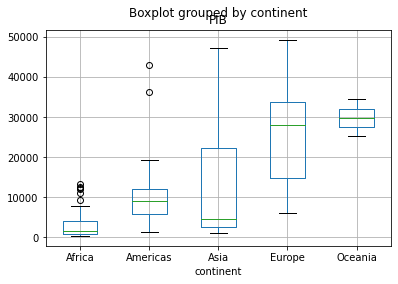

In [55]:
df[df.year==2007].boxplot(column='PIB',by='continent')

9) Afficher dans une nouvelle dataframe (df2), les pays du continent Africa ayant la variable PIB comme valeur abbérante en 2007

In [58]:
df3=df[df.year==2007][df[df.year==2007].continent=='Africa']
q1,q2,q3,lower_limit,upper_limit =calculs(df3.PIB)
df3[(df3.PIB<= lower_limit) | (df3.PIB >=upper_limit)]

,country,year,Population,continent,Age,PIB
167,Botswana,2007,1639131.0,Africa,50.728,12569.851770
491,Equatorial Guinea,2007,551201.0,Africa,51.579,12154.089750
551,Gabon,2007,1454867.0,Africa,56.735,13206.484520
911,Libya,2007,6036914.0,Africa,73.952,12057.499280
983,Mauritius,2007,1250882.0,Africa,72.801,10956.991120
1415,South Africa,2007,43997828.0,Africa,49.339,9269.657808


10) 
* Dans une nouvelle DataFrame, garder seulement les colonnes ('continent', 'year', 'Population') et les années 1952 et 2007
* Afficher la population totale de chaque continent pour les années 1952 et 2007

In [67]:
df4=df[(df.year==1952)| (df.year==2007)].iloc[:,1:4]
df4

,year,Population,continent
0,1952,8425333.0,Asia
11,2007,31889923.0,Asia
12,1952,1282697.0,Europe
23,2007,3600523.0,Europe
24,1952,9279525.0,Africa
...,...,...,...
1679,2007,22211743.0,Asia
1680,1952,2672000.0,Africa
1691,2007,11746035.0,Africa
1692,1952,3080907.0,Africa


In [68]:
df4.groupby('continent').Population.sum()

continent
Africa      1.167180e+09
Americas    1.244024e+09
Asia        5.207311e+09
Europe      1.004219e+09
Oceania     3.523595e+07
Name: Population, dtype: float64

10) Afficher sous forme de barres verticales (histogrammes) la population totale de chaque continent pour les année 1952 et 2007

<AxesSubplot: xlabel='continent'>

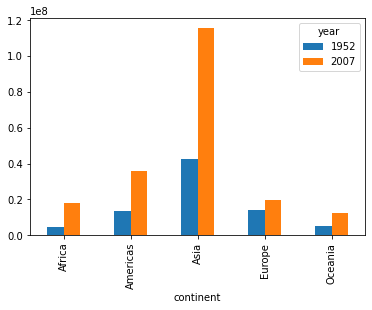

In [69]:
df5=df4.pivot_table(index="continent",columns="year",values="Population")
df5.plot.bar()

11) Afficher pour chaque continent, le pays qui la plus grande valeur de PIB en 2007

In [72]:
df6=df[df.year==2007]
df7 = df6.groupby(["continent"])["PIB"].max()
df.merge(df7)

,country,year,Population,continent,Age,PIB
0,Australia,2007,20434176.0,Oceania,81.235,34435.36744
1,Gabon,2007,1454867.0,Africa,56.735,13206.48452
2,Kuwait,2007,2505559.0,Asia,77.588,47306.98978
3,Norway,2007,4627926.0,Europe,80.196,49357.19017
4,United States,2007,301139947.0,Americas,78.242,42951.65309
